In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/s2/7cbjq2f97tn_38g6gwldk_f40000gn/T/ipykernel_94402/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [25]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [26]:
# Save references to each table



In [27]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
print(f"Most Recent Date: {most_recent_date}")


Most Recent Date: 2017-08-23


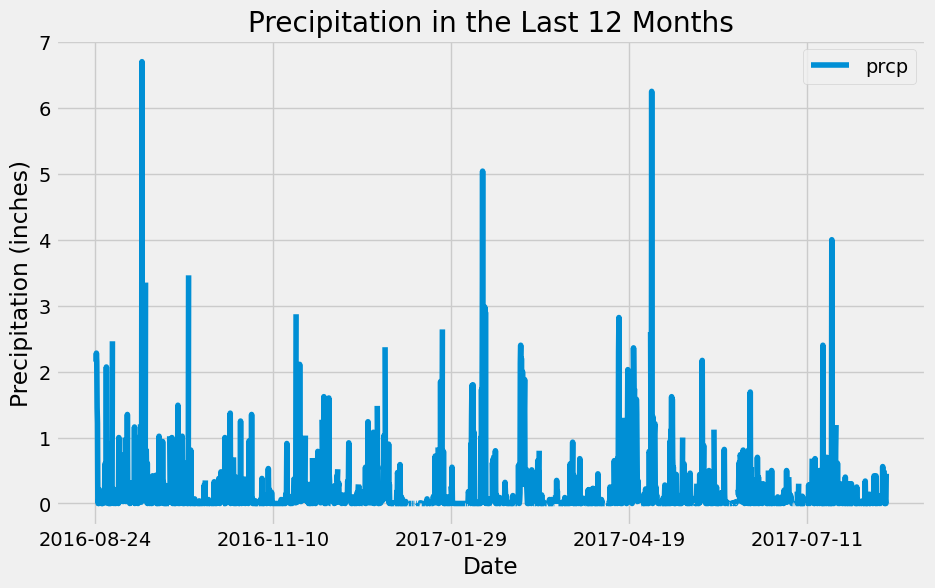

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)
#filter to the query to include only records where the date is greater than or equal to one_year_ago
#Select only the "date" and "prcp" values.
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

#Load Data into Pandas DataFrame:
#creates a DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
#his method sets the 'date' column as the index of the DataFrame
precipitation_df.set_index('date', inplace=True)
#sorts the DataFrame based on the index 
precipitation_df.sort_index(inplace=True)


#Plot the Precipitation Data:
#precipitation_df.plot-create a plot from a Pandas DataFrame
precipitation_df.plot(figsize=(10, 6), title="Precipitation in the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.show()




In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(precipitation_df.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).first()[0]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]
print(f"Most Active Station: {active_stations}")

Most Active Station: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

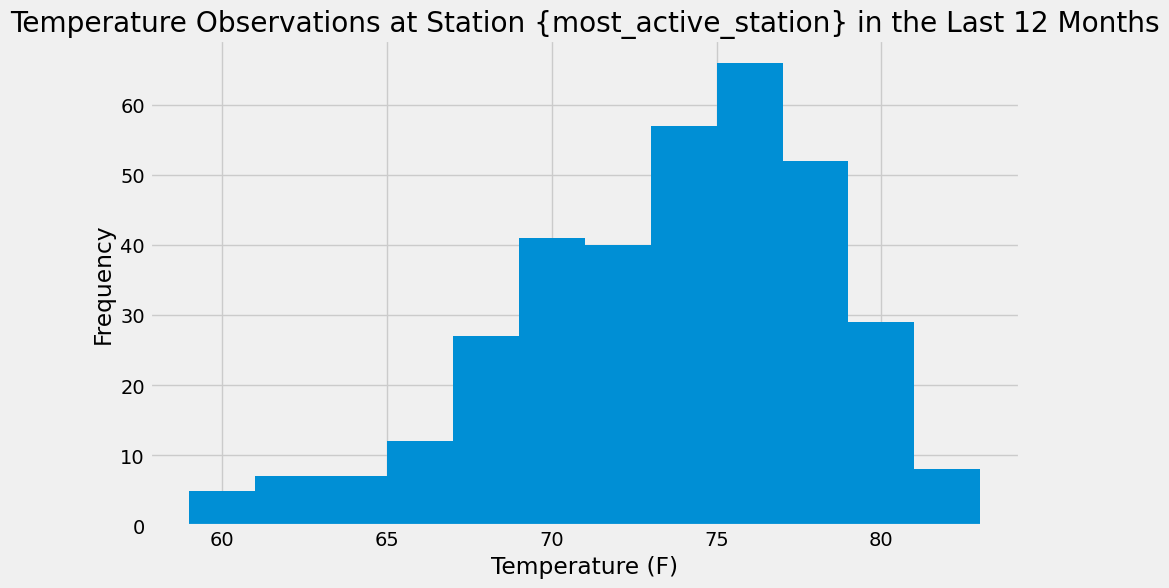

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago).all()
temp_df = pd.DataFrame(temp_data, columns=['date', 'tobs'])

temp_df['tobs'].plot(kind='hist', bins=12, figsize=(10, 6), title="Temperature Observations at Station {most_active_station} in the Last 12 Months")
plt.xlabel("Temperature (F)")
plt.show()

# Close Session

In [35]:
# Close Session
session.close()

In [ ]:
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]
print(f"Most Active Station: {active_stations}")


active_stations - session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count)(Measurement.station.dec()).all(
    most_active_station = active_stations[0][0]
    print(f"Most Active Station: {active_stations}")
)